# **KMeans clustering**

In [33]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
#code to choose file and upload it
from google.colab import files
uploaded=files.upload()

Saving fish.csv to fish (1).csv


In [35]:
#read the uploaded file
data=pd.read_csv('fish.csv',header=None)
data

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [36]:
#adding titles for columns
data.columns=['Species','Weight','Length1','Length2','Length3','Height','Width']
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  85 non-null     object 
 1   Weight   85 non-null     float64
 2   Length1  85 non-null     float64
 3   Length2  85 non-null     float64
 4   Length3  85 non-null     float64
 5   Height   85 non-null     float64
 6   Width    85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [38]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [39]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [40]:
#check for null values
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [41]:
#defining x
x=data[['Height','Width']]
x.head()

,Height,Width
0,38.4,13.4
1,40.0,13.8
2,39.8,15.1
3,38.0,13.3
4,36.6,15.1


In [42]:
#import kmeans cluster
from sklearn.cluster import KMeans

In [43]:
#performing wcss for evaluating optimal number of clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

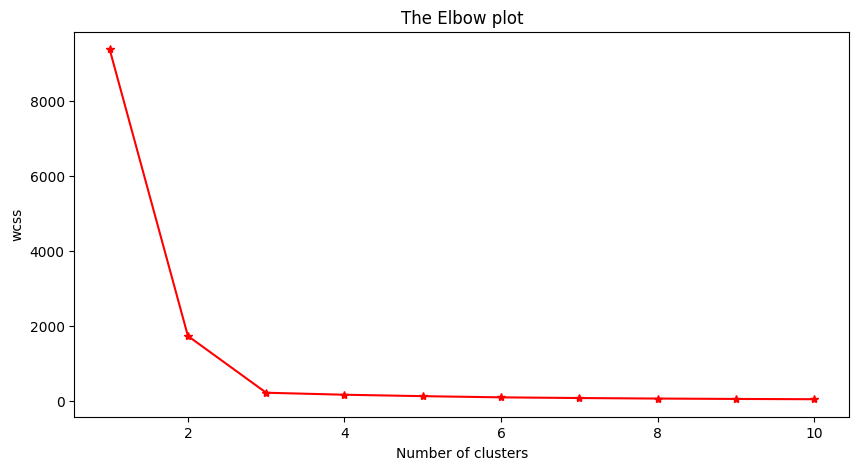

In [44]:
#visualizing with elbow method to get the optimal number of clusters from wcss
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,marker='*',color='red')
plt.title('The Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
#applying k means clustering with optimal number of clusters
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [46]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [47]:
#adding clusters to which the species are assigned in the dataset
data['cluster']=y_kmeans
data

,Species,Weight,Length1,Length2,Length3,Height,Width,cluster
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4,2
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8,2
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1,2
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3,2
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1,2
...,...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2,1
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7,1
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6,1
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6,1


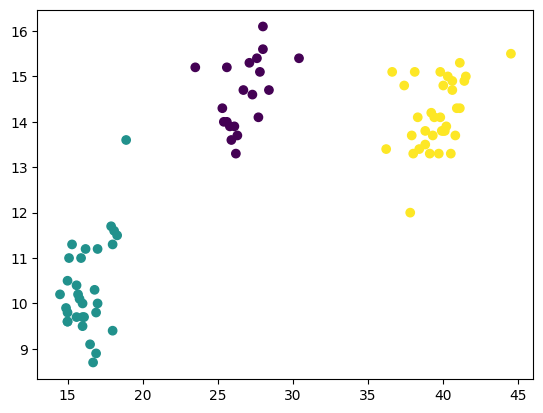

In [48]:
#visualising the clusters formed using scatter plot
plt.scatter(x['Height'],x['Width'],c=y_kmeans)
plt.show()

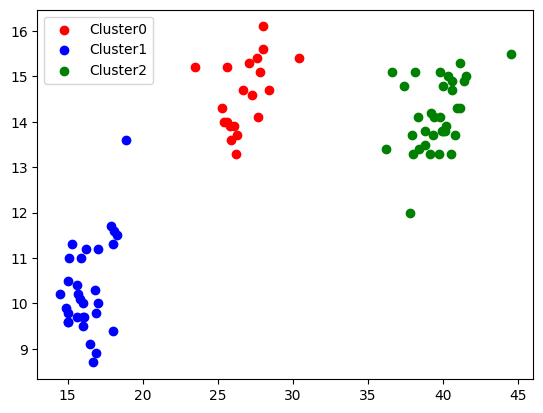

In [49]:
#assigning the labels and colors to the visualisation
color=['red','blue','green']
for i in range(3):
  cluster_data=x[y_kmeans==i]
  plt.scatter(cluster_data['Height'],cluster_data['Width'],c=color[i],label=f'Cluster{i}')
  plt.legend()

In [50]:
#defining function to predict new species
def predict_cluster(Height,Width):
  new_data=[[Height,Width]]
  cluster=kmeans.predict(new_data)
  return cluster[0]

In [51]:
#predicting the cluster of new data given
new_height=38
new_width=13.3
predicted_cluster=predict_cluster(new_height,new_width)
print(f'species belongs to {predicted_cluster}')

species belongs to 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [52]:
#importing silhoutte_score to perform and measure the quality of clustering by measuring how similar each point is to its own cluster compared to other cluster
from sklearn.metrics import silhouette_score
ssc=silhouette_score(x,y_kmeans)
ssc

0.8248956214225807

**Here the silhoutte_score is 0.824 which is closer to 1. This indicates that the sample is far away from the neighboring clusters and belongs to its own cluster.**

# **Hierarchial Clustering**
**AgglomerativeClustering**

In [53]:
#defining x1
x1=data.iloc[:,[5,6]].values
type(x1)

numpy.ndarray

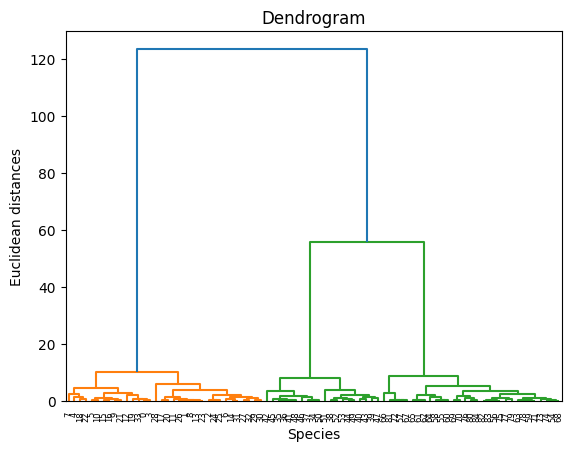

In [54]:
#visualizing a dendrogram to get the optimal number of clusters and show how the clusters are merged together.
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

In [55]:
#importing agglomerative clustering and assigning clusters for each data
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [56]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
data['cluster']=y_hc
data

,Species,Weight,Length1,Length2,Length3,Height,Width,cluster
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4,0
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8,0
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1,0
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3,0
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0
...,...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2,1
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7,1
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6,1
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6,1


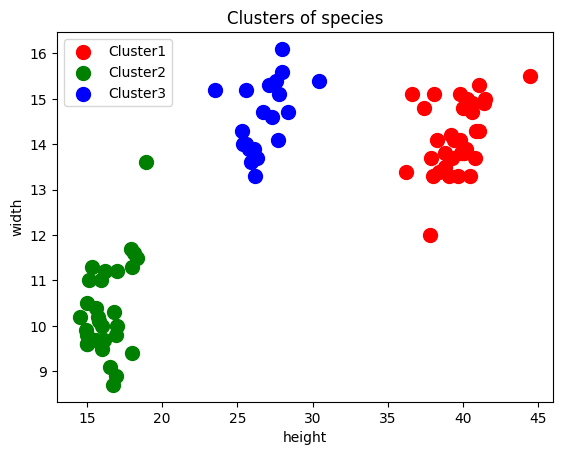

In [58]:
#ploting clusters using scatter plot
plt.scatter(x1[y_hc==0,0],x1[y_hc==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x1[y_hc==1,0],x1[y_hc==1,1],s=100,c='green',label='Cluster2')
plt.scatter(x1[y_hc==2,0],x1[y_hc==2,1],s=100,c='blue',label='Cluster3')

plt.title('Clusters of species')
plt.xlabel('height')
plt.ylabel('width')
plt.legend()
plt.show()

In [59]:
#importing silhoutte_score to perform and measure the quality of clustering by measuring how similar each point is to its own cluster compared to other cluster
from sklearn.metrics import silhouette_score
ssc=silhouette_score(x1,y_hc)
ssc

0.8248956214225807

**Here the silhoutte_score is 0.824 which is closer to 1. This indicates that the sample is far away from the neighboring clusters and belongs to its own cluster.**
